In [2]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split 


from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matlpotlib inline



UsageError: Line magic function `%matlpotlib` not found.


Spotify Song Attribute EDA 
     
   import dataset
   EDA to visulaize data
   train classifier
   predict target

In [3]:
data=pd.read_csv('Data/data.csv')

In [4]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [7]:
train, test = train_test_split(data,test_size=0.15)

In [8]:
print("Training size :{}; Test Size {} ".format(len(train),len(test)))

Training size :1714; Test Size 303 


In [9]:
#custom colors

red_blue = ["#195B5E","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [10]:
pos_tempo = data[data['target']==1]['tempo']
neg_tempo = data[data['target']==0]['tempo']
pos_dance = data[data['target']==1]['danceability']
neg_dance = data[data['target']==0]['danceability']
pos_duration = data[data['target']==1]['duration_ms']
neg_duration = data[data['target']==0]['duration_ms']
pos_loudness = data[data['target']==1]['loudness']
neg_loudness = data[data['target']==0]['loudness']
pos_speechiness= data[data['target']==1]['speechiness']
neg_speechiness= data[data['target']==0]['speechiness']
pos_valence= data[data['target']==1]['valence']
neg_valence= data[data['target']==0]['valence']
pos_energy= data[data['target']==1]['energy']
neg_energy= data[data['target']==0]['energy']
pos_acousticness= data[data['target']==1]['acousticness']
neg_acousticness= data[data['target']==0]['acousticness']
pos_key= data[data['target']==1]['key']
neg_key = data[data['target']==0]['key']
pos_instrumentalness = data[data['target']==1]['instrumentalness']
neg_instrumentalness= data[data['target']==0]['instrumentalness']


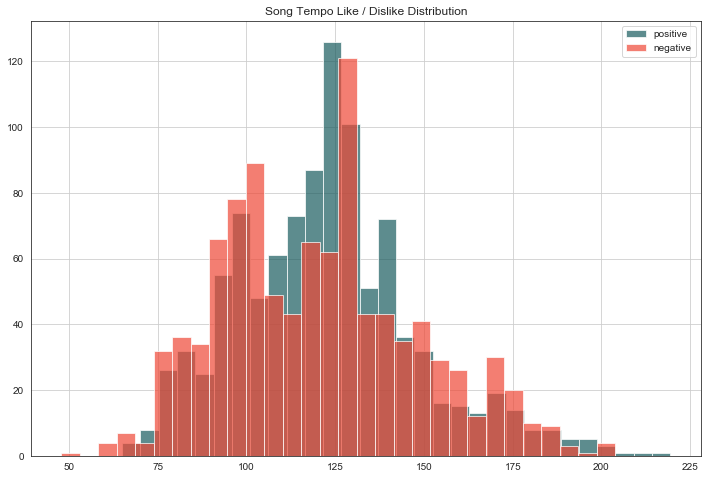

In [11]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like / Dislike Distribution')
pos_tempo.hist(alpha = 0.7,bins =30, label ='positive')
neg_tempo.hist(alpha = 0.7,bins =30, label ='negative')
plt.legend(loc="upper right")

C:\Users\BBalaji\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\BBalaji\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\BBalaji\Anaconda3\lib\site-packages\matplotlib\cbook\deprecat

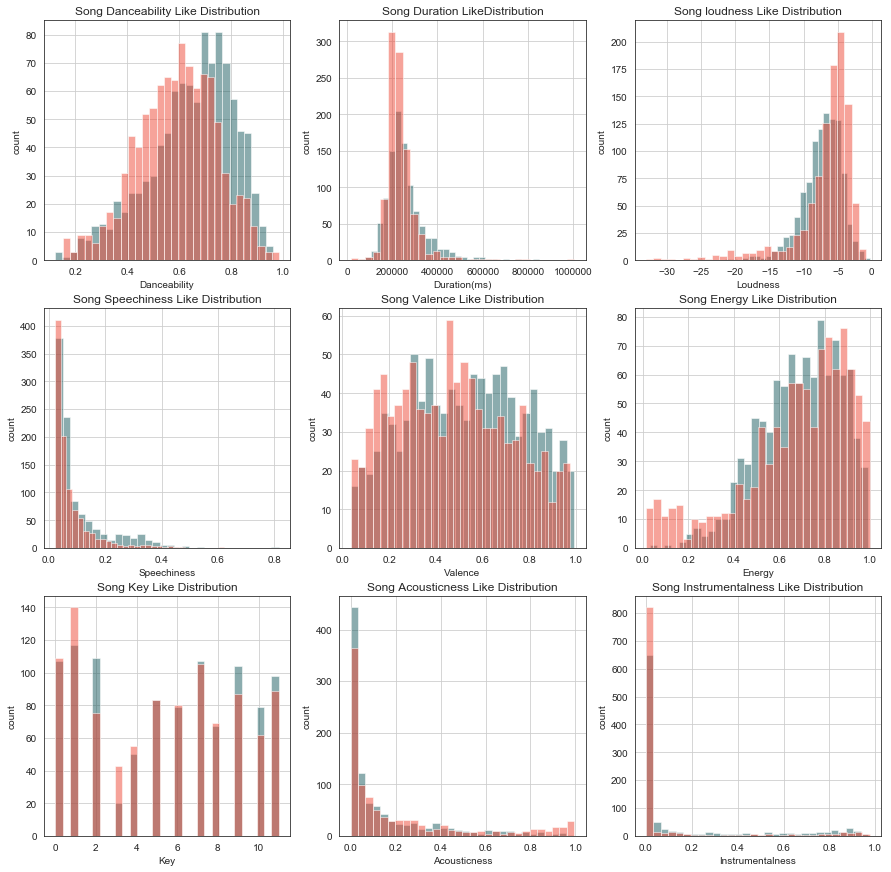

In [12]:
fig2=plt.figure(figsize=(15,15))


#Danceability 
ax3=fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha =0.5, bins=30)
ax4=fig2.add_subplot(331)
neg_dance.hist(alpha =0.5, bins=30)


#Durability 

ax5=fig2.add_subplot(332)
pos_duration.hist(alpha =0.5, bins=30)
ax5.set_xlabel('Duration(ms)')
ax5.set_ylabel('count')
ax5.set_title('Song Duration LikeDistribution')
ax6=fig2.add_subplot(332)
neg_duration.hist(alpha =0.5, bins=30)


#Loudness

ax7=fig2.add_subplot(333)
pos_loudness.hist(alpha =0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('count')
ax7.set_title('Song loudness Like Distribution')
ax8=fig2.add_subplot(333)
neg_loudness.hist(alpha =0.5, bins=30)



#Speechiness 

ax9=fig2.add_subplot(334)
pos_speechiness.hist(alpha =0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('count')
ax9.set_title('Song Speechiness Like Distribution')
ax10=fig2.add_subplot(334)
neg_speechiness.hist(alpha =0.5, bins=30)


#Valence 

ax11=fig2.add_subplot(335)
pos_valence.hist(alpha =0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('count')
ax11.set_title('Song Valence Like Distribution')
ax12=fig2.add_subplot(335)
neg_valence.hist(alpha =0.5, bins=30)


#Energy

ax13=fig2.add_subplot(336)
pos_energy.hist(alpha =0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('count')
ax13.set_title('Song Energy Like Distribution')
ax14=fig2.add_subplot(336)
neg_energy.hist(alpha =0.5, bins=30)


#Key

ax15=fig2.add_subplot(337)
pos_key.hist(alpha =0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('count')
ax15.set_title('Song Key Like Distribution')
ax15=fig2.add_subplot(337)
neg_key.hist(alpha =0.5, bins=30)


#Acousticness

ax16=fig2.add_subplot(338)
pos_acousticness.hist(alpha =0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('count')
ax16.set_title('Song Acousticness Like Distribution')
ax16=fig2.add_subplot(338)
neg_acousticness.hist(alpha =0.5, bins=30)


#Instrumentalness

ax17=fig2.add_subplot(339)
pos_instrumentalness.hist(alpha =0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('count')
ax17.set_title('Song Instrumentalness Like Distribution')
ax17=fig2.add_subplot(339)
neg_instrumentalness.hist(alpha =0.5, bins=30)


In [13]:
c= DecisionTreeClassifier(min_samples_split=100)

In [14]:
features= ["danceability","loudness","valence","energy","instrumentalness","acousticness","key","speechiness","duration_ms"]

In [15]:
X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

In [16]:
y_test

334     1
1224    0
1958    0
1392    0
368     1
619     1
1947    0
1517    0
596     1
1597    0
1191    0
353     1
1622    0
79      1
33      1
702     1
1515    0
125     1
283     1
1411    0
1550    0
1919    0
1679    0
1635    0
1072    0
1807    0
373     1
1108    0
1519    0
938     1
       ..
1166    0
354     1
739     1
534     1
723     1
1992    0
1457    0
423     1
1245    0
1189    0
1265    0
53      1
943     1
890     1
831     1
1827    0
1821    0
1102    0
417     1
603     1
1284    0
515     1
127     1
1965    0
529     1
1391    0
1116    0
1447    0
1879    0
983     1
Name: target, Length: 303, dtype: int64

In [18]:
dt = c.fit(X_train,y_train)

In [19]:
def show_tree(tree,features,path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

C:\Users\BBalaji\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


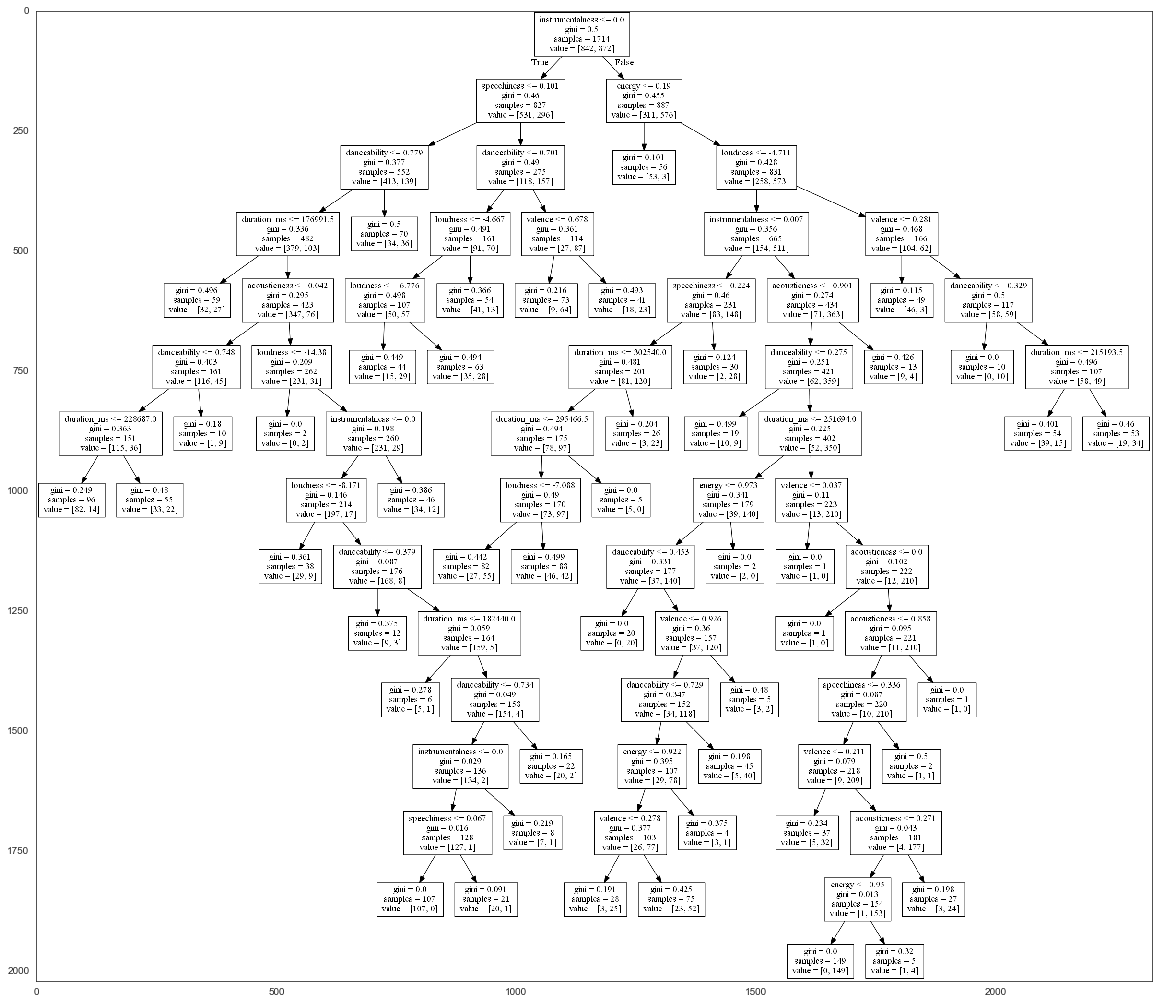

In [20]:
show_tree(dt,features,'dec_tree_01.png')

In [21]:
y_pred = c.predict(X_test)

In [22]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,

In [25]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)*100 

In [26]:
print("Accuracy Score Using Decision Tree :" , round(score,1),'%')

Accuracy Score Using Decision Tree : 74.3 %
